# Calculating Probabilities Using Probability Distributions

In [4]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import norm, shapiro, binom, poisson, geom

### Normal Distribution Probabilities

In [4]:
df = pd.read_csv('../data/incomes.csv')
df.head()

,Income,Income_Normal,Income_Uniform
0,25767,25767,50966
1,66021,66021,81023
2,76163,76163,81015
3,48429,48429,26673
4,58805,58805,31844


(array([3., 2., 4., 2., 4., 7., 3., 3., 3., 1.]),
 array([25767. , 31840.3, 37913.6, 43986.9, 50060.2, 56133.5, 62206.8,
        68280.1, 74353.4, 80426.7, 86500. ]),
 <BarContainer object of 10 artists>)

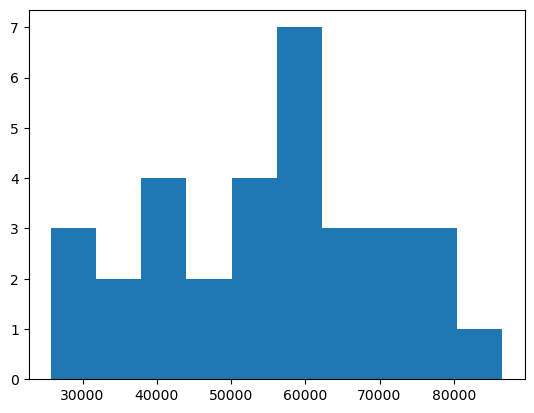

In [18]:
#Test for normality - Visual inspection
plt.hist(df['Income'])

(array([ 5.,  6., 11.,  6.,  4.]),
 array([25767. , 37913.6, 50060.2, 62206.8, 74353.4, 86500. ]),
 <BarContainer object of 5 artists>)

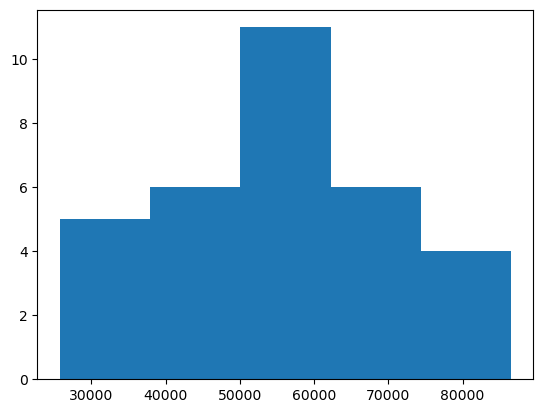

In [84]:
#Test for normality - Visual inspection, fewer bins
plt.hist(df['Income'], bins=5)

In [28]:
#Test for normality - Shapiro-Wilk
#H0: Normally distributed data, HA: Non-normally distributed data
#If p-value is < alpha, reject H0 and conclude data is not normally distributed
stat, pvalue = shapiro(df['Income'])
print(f'Shapiro-Wilk Test Statistic: {stat}')
print(f'P-Value: {pvalue}')

Shapiro-Wilk Test Statistic: 0.9786182641983032
P-Value: 0.7585194110870361


In [101]:
alpha = 0.05

if pvalue > alpha:
    print('Fail to Reject H0 - Data are normally distributed')
elif pvalue < alpha:
    print('Reject H0 - Data are not normally distributed')

Fail to Reject H0 - Data are normally distributed


In [41]:
#Calculate mean and standard deviation
mean = np.mean(df['Income'])
stdev = np.std(df['Income'])
print(mean)
print(stdev)

54975.40625
15733.012904517396


In [37]:
#Calculate z for a given value of x
x = 50000
z = (x - mean) / stdev
z

-0.3162398887101541

In [47]:
#Calculate z for several values
xs = [40000, 50000, 60000, 70000, 80000, 90000, 100000]
zs = []
for i in xs:
    z = (i - mean) / stdev
    zs.append(z)
zs

[-0.9518460539557642,
 -0.3162398887101541,
 0.31936627653545596,
 0.954972441781066,
 1.590578607026676,
 2.226184772272286,
 2.8617909375178963]

In [78]:
#Calculate z for the whole series
zs = []
for i in df['Income']:
    z = (i - mean) / stdev
    zs.append(z)
zs

[-1.856504308949841,
 0.7020647486298378,
 1.3466965214219355,
 -0.41609361727023947,
 0.24341133978860555,
 -0.27867556434413854,
 -1.8110584681347799,
 0.2953403634891719,
 0.060801688513541785,
 -0.9008068788865418,
 0.09226419369319948,
 0.563756847072393,
 0.9055858427414821,
 0.09881093719522926,
 0.7745874120843619,
 -0.30015905272944016,
 -1.1951560940117838,
 1.472292299674468,
 -0.7057393467726639,
 0.44769516129854464,
 -1.7627523995761136,
 1.558035571366101,
 0.8671952303606473,
 -0.41628429911981313,
 -1.2847130026948903,
 1.1872864951783366,
 2.0037226144363225,
 -1.030788339679269,
 0.2561870237100423,
 -0.9715498450783782,
 0.07758169127602589,
 -0.023034764682354186]

In [58]:
#Z table values from scipy.norm's cumulative distribution function...function
#This function returns the area under the curve left of a given value
#Use for problems of p(x<X)
norm.cdf(50000, mean, stdev)

0.37591021664376195

In [60]:
#Z table values for multiple values
xs = [40000, 50000, 60000, 70000, 80000, 90000, 100000]
ps = []
for i in xs:
    p = norm.cdf(i, mean, stdev)
    ps.append(p)

ps

[0.1705875308685853,
 0.37591021664376195,
 0.6252756098442375,
 0.8302041832778537,
 0.9441477789351702,
 0.9869990962391428,
 0.9978937266211311]

In [64]:
#For p(x>X) problems, subtract z table value from one
1 - norm.cdf(50000, mean, stdev)

#Z table values for multiple values
xs = [40000, 50000, 60000, 70000, 80000, 90000, 100000]
ps = []
for i in xs:
    p = 1 - norm.cdf(i, mean, stdev)
    ps.append(p)

ps

[0.8294124691314146,
 0.624089783356238,
 0.37472439015576253,
 0.16979581672214628,
 0.05585222106482979,
 0.013000903760857163,
 0.002106273378868928]

In [74]:
#For p(XL<x<XH) problems, subtract high z table value from low z table value
x_low = 40000
x_high = 60000

p_low = norm.cdf(x_low, mean, stdev)
p_high = norm.cdf(x_high, mean, stdev)

p = p_high - p_low 
p

0.45468807897565217

In [98]:
#Custom function to find normally distributed probabilities
def prob_finder(values, x_or_low_x, test_type, high_x=0):
    mean = np.mean(values)
    stdev = np.std(values)
    if test_type == "x>":
        p = 1 - norm.cdf(x_or_low_x,mean,stdev)
    elif test_type == "x<":
        p = norm.cdf(x_or_low_x,mean,stdev)
    elif test_type == "<x<":
        p = norm.cdf(high_x,mean,stdev) - norm.cdf(x_or_low_x,mean,stdev)
    else:
        print("Unknown test type")
    return p

print(prob_finder(df['Income'], 50000, "x<"))
print(prob_finder(df['Income'], 50000, "x>"))
print(prob_finder(df['Income'], 40000, "<x<", 60000))

0.37591021664376195
0.624089783356238
0.45468807897565217


### Binomial Distribution Probabilities

In [ ]:
#Factorials
#Factorials = n! = Multiply a number by all the integers below it 
#5! = 5x4x3x2x1 = 120
#0! = 1, 1! = 1

def factorial(n):
    if n == 0 or n == 1:
        return 1
    else:
        result = 1
        for i in range(2, n + 1): #n + 1 since range stops before last number
            result *= i #inplace multiplication
        return result
    
factorial(5)

In [ ]:
#Combinations
#Combinations = How many sets of k-size can be made out of n-items, if order doesnt matter

def combination(n, k):
    combinations = factorial(n) / ((factorial(k) * factorial(n - k)))
    return int(combinations)

combination(10,4)

In [ ]:
#Alternatively...
print(math.factorial(5))
print(math.comb(10,4))

In [ ]:
#Creating a binomial formula function
#x = number of successes, n = number of trials, pi = probability of success
def binomial(x,n,pi):
    c = combination(n,x)
    p = c * (pi**x)*(1-pi)**(n-x)
    return p

In [ ]:
#Creating a probability distribution
successes = [0,1,2,3,4,5,6,7,8,9,10]
pi = 0.1
n = 10
probs = []

for i in successes:
    p = binomial(i,n,pi)
    probs.append(p)
    
print(probs)

In [ ]:
#Plotting the distribution 
plt.bar(successes, probs)
plt.title('Binomial Probability Mass Function')
plt.xlabel('X')
plt.ylabel('Probability')
plt.show()

In [ ]:
#p(x=2), 10 trials, 2 successes, probability of success = 10%
n = 10
x = 2
pi = 0.10
binomial(x,n,pi)

In [ ]:
#p(x<2)
n = 10
x = 2
pi = 0.10
p = 0

for i in range(0, x): #Use x for p(x<X) and x+1 for p(x<=X)
    p += binomial(i, n, pi)

print(p)

In [ ]:
#p(x<=2)
n = 10
x = 2
pi = 0.10
p = 0

for i in range(0, x + 1): 
    p += binomial(i,n,pi)

print(p)

In [ ]:
#(x>2)
n = 10
x = 2
pi = 0.10
c = 0

for i in range(0, x + 1):
    c += binomial(i, n, pi)
    p = 1 - c
    
print(p)

In [ ]:
#(x>=2)
n = 10
x = 2
pi = 0.10
c = 0

for i in range(0, x):
    c += binomial(i, n, pi)
    p = 1 - c
    
print(p)

In [ ]:
#Custom function to find binomially distributed probabilities
def binom_prob_finder(n, x, pi, test_type):
    if test_type == "=":
        p = binomial(x, n, pi)
    elif test_type == "x>=":
        c = 0
        for i in range(0, x):
            c += binomial(i, n, pi)
            p = 1 - c
    elif test_type == "x>":
        c = 0
        for i in range(0, x + 1):
            c += binomial(i, n, pi)
            p = 1 - c
    elif test_type == "x<=":
        p = 0
        for i in range(0, x + 1): #Use x+1 for p(x<=X) and x for p(x<X)
            p += binomial(i,n,pi)
    elif test_type == "x<":
        p = 0
        for i in range(0, x):
            p += binomial(i, n, pi)
    return p

print(binom_prob_finder(10, 2, 0.1, "="))
print(binom_prob_finder(10, 2, 0.1, "x>"))
print(binom_prob_finder(10, 2, 0.1, "x>="))
print(binom_prob_finder(10, 2, 0.1, "x<"))
print(binom_prob_finder(10, 2, 0.1, "x<="))

### Poisson Distribution Probabilities

In [ ]:
#Creating a poisson formula function
#l = lambda = average rate of events, x = number of events

def poisson(l,x):
    numerator = (l**k)*(math.exp(-l))
    denominator = factorial(x)
    p = numerator / denominator
    return p

In [ ]:
#Creating a probability mass function
x = [0,1,2,3,4,5,6,7,8,9,10]
l = 2

ps = []

for i in x:
    ps.append(poisson(l,i))

print(ps)

In [ ]:
#Plotting the probability mass function
plt.bar(x, ps)
plt.title('Poisson Probability Mass Function')
plt.xlabel('X')
plt.ylabel('Probability')
plt.show()

In [ ]:
#Calculating probabilities - lambda = 5
#(x=3)
x=3
l=5

poisson(l,x)

In [ ]:
#p(x<3)
x=3
l=5

p=0
for i in range(0, x): #Use x+1 for p(x<=X) and x for p(x<X)
    p += poisson(l,i)
    
p  

In [ ]:
#p(x<=3)
x=3
l=5

p=0
for i in range(0, x+1): 
    p += poisson(l,i)
    
p  

In [ ]:
#p(x>3)
x=3
l=5

p=0
c=0

for i in range(0, x+1): 
    c += poisson(l,i)
    p = 1 - c
    
p 

In [ ]:
#p(x>=3)
x=3
l=5

p=0
c=0

for i in range(0, x): 
    c += poisson(l,i)
    p = 1 - c
    
p

In [ ]:
#The easy way...
from scipy.stats import poisson
from scipy.stats import binom

#Binomial Probability Mass Fuction
#prob = binom.pmf(k, n, p)

#Binomial Cumulative Distribution Function
#cum_prob = binom.cdf(k, n, p)

#Poisson Probability Mass Fuction
#prob = poisson.pmf(k, mu)

#Poisson Cumulative Distribution Fuction
#cum_prob = poisson.cdf(k, mu)#p(x>=3)
x=3
l=5

p=0
c=0

for i in range(0, x): 
    c += poisson(l,i)
    p = 1 - c
    
p

In [30]:
#Geometric Distribution
from scipy.stats import geom

p = 0.3 #Probability of success
x = 3 #Attempts until success

#p(x=3)
prob_x_3 = geom.pmf(x, p) 
print(prob_x_3)

#p(x=<3)
prob_x_lessthan_3 = geom.cdf(x, p)
print(prob_x_lessthan_3)

#p(x>3)
prob_x_greaterthan_3 = 1 - geom.cdf(x, p)
print(prob_x_greaterthan_3)

0.14699999999999996
0.6569999999999999
0.3430000000000001


In [10]:
#Negative Binomial Distribution
from scipy.stats import nbinom

p = 0.2 #Probability of success
r = 3 #Number of successes

#Probability it takes 10 calls to achieve 3 sales
k = 10
prob = nbinom.pmf(k - r, r, p)
print(prob)

#Expected number of calls to make a sale
ev = r / p
print(ev)

0.06039797760000005
15.0
